In [1]:
#import csv
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

file= "dm_export_19900101_20201231.csv"

df=pd.read_csv(file,parse_dates=["MapDate"])
df["Year"]=df["MapDate"].dt.strftime('%Y')
df

,State,County,FIPS,MapDate,DSCI,Year
0,AZ,Apache County,4001,2000-01-04,43,2000
1,AZ,Apache County,4001,2000-01-11,100,2000
2,AZ,Apache County,4001,2000-01-18,100,2000
3,AZ,Apache County,4001,2000-01-25,100,2000
4,AZ,Apache County,4001,2000-02-01,100,2000
...,...,...,...,...,...,...
73427,WY,Uinta County,56041,2020-12-01,235,2020
73428,WY,Uinta County,56041,2020-12-08,235,2020
73429,WY,Uinta County,56041,2020-12-15,236,2020
73430,WY,Uinta County,56041,2020-12-22,236,2020


In [3]:
df_ca=df.loc[df.State=="CA"]
df_ca=df_ca.drop(columns=["FIPS"])
df_ca

,State,County,MapDate,DSCI,Year
16440,CA,Imperial County,2000-01-04,23,2000
16441,CA,Imperial County,2000-01-11,100,2000
16442,CA,Imperial County,2000-01-18,100,2000
16443,CA,Imperial County,2000-01-25,100,2000
16444,CA,Imperial County,2000-02-01,100,2000
...,...,...,...,...,...
19723,CA,San Bernardino County,2020-12-01,224,2020
19724,CA,San Bernardino County,2020-12-08,279,2020
19725,CA,San Bernardino County,2020-12-15,366,2020
19726,CA,San Bernardino County,2020-12-22,366,2020


In [4]:
df_ca_groups=df_ca.groupby(["State","Year"]).mean()

In [5]:
df_ca_groups.reset_index()

,State,Year,DSCI
0,CA,2000,36.544872
1,CA,2001,1.326923
2,CA,2002,285.232704
3,CA,2003,214.788462
4,CA,2004,204.967949
5,CA,2005,7.801282
6,CA,2006,66.141026
7,CA,2007,364.634615
8,CA,2008,213.283019
9,CA,2009,147.775641


In [6]:
df_ca_groups=df_ca_groups.groupby(["State","Year"]).mean().reset_index()
df_ca_groups

,State,Year,DSCI
0,CA,2000,36.544872
1,CA,2001,1.326923
2,CA,2002,285.232704
3,CA,2003,214.788462
4,CA,2004,204.967949
5,CA,2005,7.801282
6,CA,2006,66.141026
7,CA,2007,364.634615
8,CA,2008,213.283019
9,CA,2009,147.775641


<AxesSubplot:xlabel='Year'>

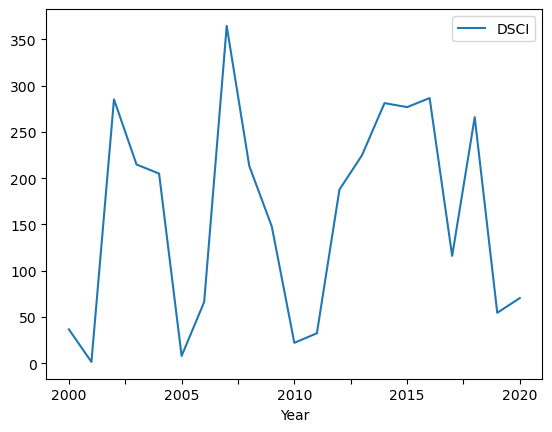

In [7]:
df_ca_groups.plot(x="Year")

In [8]:
df_ca_county_groups=df_ca.groupby(["County","Year"]).mean().reset_index()
df_ca_county_groups

,County,Year,DSCI
0,Imperial County,2000,48.057692
1,Imperial County,2001,0.000000
2,Imperial County,2002,283.452830
3,Imperial County,2003,212.115385
4,Imperial County,2004,214.576923
...,...,...,...
58,San Bernardino County,2016,286.750000
59,San Bernardino County,2017,47.923077
60,San Bernardino County,2018,209.038462
61,San Bernardino County,2019,35.169811


In [9]:
county_list=df_ca["County"].unique()
county_list

array(['Imperial County', 'Riverside County', 'San Bernardino County'],
      dtype=object)

Imperial County
Riverside County
San Bernardino County


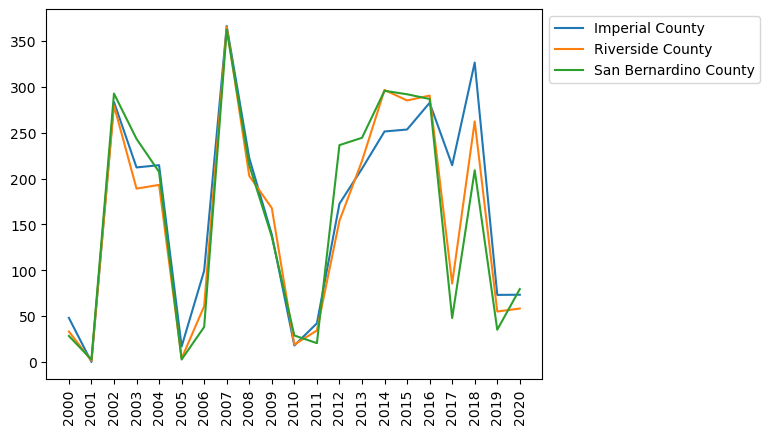

In [11]:
for county in county_list:
    print(county)
    df_ca_map=df_ca_county_groups.loc[df_ca_county_groups["County"]==county]
    df_ca_map=df_ca_map.drop(columns=["County"])
    df_ca_map=df_ca_map.rename(columns={"DSCI": county + " DSCI "})
    x2=df_ca_map["Year"].to_list()
    y2=df_ca_map[county + " DSCI "].to_list()
    plt.plot(x2,y2,label=county)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()